In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [2]:
utr3_df = pd.read_csv('../Data_Processing/vJun26_3UTR_Timo_Matt_Merged_data_mincount100.csv', index_col = 0)
utr3_df

,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID,fold,mean_center_of_mass,diff,cell_type_code
26928,CGAATTGTAATAAGTGTCCTAAGTAGCAGGACTTAACATAGAAAGA...,2.545337,2.178205,2885.337177,0.462334,A549,TSC22D2_part_21_type_middle_overlap_50,val,2.752998,-0.207661,0
26145,TCAAATGCATTACGCTAAAGGAAAGAACCCAGTCCCAAAAAGTTAC...,2.471913,-1.341167,2850.077752,-0.128891,c6_Rep1,NaN,train,2.552489,-0.080576,1
10787,ATGCCTGCCTATTTGGATGGGTATGTCAAACGCTTTCTTCTGGACA...,2.196962,-8.305841,939.037621,-1.129008,c1_Rep1,NaN,train,2.335757,-0.138795,2
9554,AGATTTTCGTCCTGAAAACTTGGGAGGAGGAATTGTTTGATTCTCC...,3.091018,20.869890,1558.650776,0.992797,c10_Rep1,NaN,train,2.666265,0.424753,3
7106,TGGTTTTTATTTGCAGTTTTTAGTTGCTGTAATTGTTGCTGTTTCC...,2.848042,10.896188,1225.169841,1.022520,c2_Rep2,NaN,train,2.779732,0.068310,4
...,...,...,...,...,...,...,...,...,...,...,...
13410,ATTCTCCAGGTCCAAGGCAGAGATCCTGAAAAGATAGGGCTATTGT...,2.379524,-6.346775,3469.086656,-0.608390,c6_Rep1,NaN,train,2.423649,-0.044125,1
16251,CGGCTGGAAGCAGAGGCCTTCGTAGGTGATGGCCTGCATGTTGTAA...,2.557310,2.701370,2777.289157,0.258354,c6_Rep1,NaN,train,2.542396,0.014913,1
18305,TGTTTTTCTCACTGTGGTGTGATTGGCTAAACAATCTCGCATTAAA...,3.046742,17.155525,1230.703443,2.778007,MP2,PHF6_part_18_type_middle_overlap_50,train,2.751035,0.295707,5
12460,AACTGCAGGGCTGTCAGGAGGATCAGAAATACTGTAACAGACATAA...,2.009885,-23.079223,2771.769401,-2.439837,c2_Rep1,NaN,train,2.088828,-0.078943,10


# property

In [3]:
utr3_df['cell_type'].unique()

array(['A549', 'c6_Rep1', 'c1_Rep1', 'c10_Rep1', 'c2_Rep2', 'MP2', 'MCF7',
       'c13_Rep2', 'K562', 'BxPC3', 'c2_Rep1', 'PC3', 'c17_Rep1',
       'c17_Rep2', 'c4_Rep2', 'c13_Rep1', 'c4_Rep1', 'c6_Rep2', 'Colo320',
       'H23'], dtype=object)

<Axes: xlabel='center_of_mass', ylabel='Count'>

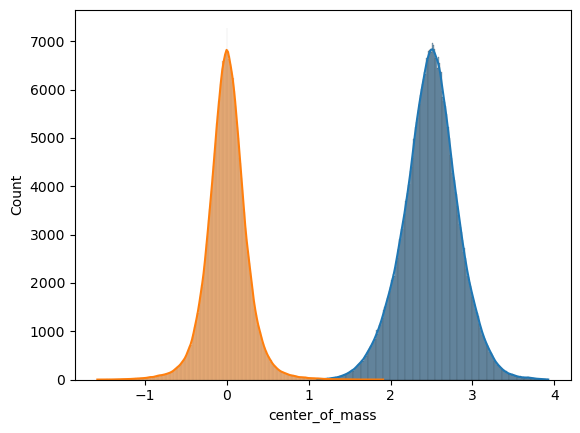

In [4]:
sns.histplot(utr3_df.center_of_mass, kde = True)
sns.histplot(utr3_df['diff'], kde = True)

In [5]:
def combined_4_categorization_grid_updated(mass, diff):

    # mass分级
    if mass < 2.5:
        mass_cat = 0
    elif mass < 3.0:
        mass_cat = 1
    else:
        mass_cat = 2
    
    # diff分级
    if diff <= 0:
        diff_cat = 0
    else:
        diff_cat = 1
    
    # 组合规则
    combination_map = {
        (0, 0): 0, (0, 1): 1, 
        (1, 0): 2, (1, 1): 3, 
        (2, 0): 3, (2, 1): 3, 
    }
    
    return combination_map.get((mass_cat, diff_cat), 2)


def combined_5_categorization_grid_updated(mass, diff):
    """
    基于二维网格的组合分级（更新版本）
    添加Category 4: center_of_mass > 3 或者 diff > 0.5
    """
    # 首先检查是否满足Category 4的条件
    if mass > 3.0 or diff > 0.5:
        return 4
    
    # 如果不满足Category 4条件，继续原来的分级逻辑
    # mass分级
    if mass < 2.5:
        mass_cat = 0
    elif mass < 3.0:
        mass_cat = 1
    else:
        mass_cat = 2
    
    # diff分级
    if diff <= 0:
        diff_cat = 0
    else:
        diff_cat = 1
    
    # 组合规则
    combination_map = {
        (0, 0): 0, (0, 1): 1, 
        (1, 0): 2, (1, 1): 3, 
        (2, 0): 3, (2, 1): 3, 
    }
    
    return combination_map.get((mass_cat, diff_cat), 2)


In [6]:
# 获取所有唯一的cell_type
utr3_unique_cell_types = utr3_df['cell_type'].unique()
print("Unique cell_type:", utr3_unique_cell_types)

# 创建cell_type到字母的映射字典
utr3_cell_type_mapping = {}
for i, cell_type in enumerate(utr3_unique_cell_types):
    utr3_cell_type_mapping[cell_type] = chr(ord('A') + i)
print("Cell type Mapping:", utr3_cell_type_mapping)

Unique cell_type: ['A549' 'c6_Rep1' 'c1_Rep1' 'c10_Rep1' 'c2_Rep2' 'MP2' 'MCF7' 'c13_Rep2'
 'K562' 'BxPC3' 'c2_Rep1' 'PC3' 'c17_Rep1' 'c17_Rep2' 'c4_Rep2' 'c13_Rep1'
 'c4_Rep1' 'c6_Rep2' 'Colo320' 'H23']
Cell type Mapping: {'A549': 'A', 'c6_Rep1': 'B', 'c1_Rep1': 'C', 'c10_Rep1': 'D', 'c2_Rep2': 'E', 'MP2': 'F', 'MCF7': 'G', 'c13_Rep2': 'H', 'K562': 'I', 'BxPC3': 'J', 'c2_Rep1': 'K', 'PC3': 'L', 'c17_Rep1': 'M', 'c17_Rep2': 'N', 'c4_Rep2': 'O', 'c13_Rep1': 'P', 'c4_Rep1': 'Q', 'c6_Rep2': 'R', 'Colo320': 'S', 'H23': 'T'}


In [7]:
utr3_df['combined_4_category'] = utr3_df.apply(
    lambda row: combined_4_categorization_grid_updated(row['center_of_mass'], row['diff']), 
    axis=1
)
utr3_df['combined_5_category'] = utr3_df.apply(
    lambda row: combined_5_categorization_grid_updated(row['center_of_mass'], row['diff']), 
    axis=1
)

### visualize 4 level

In [8]:
print("Updated grading result distribution:")
print(utr3_df['combined_4_category'].value_counts().sort_index())

# 查看不同cell_type下的分级分布
print("\nHierarchical distribution under different cell_type:")
print(pd.crosstab(utr3_df['cell_type'], utr3_df['combined_4_category']))

# 显示分级规则说明
print("\nClassification rule description:")
print("Category 4: center_of_mass > 3.0 OR diff > 0.5 (high activity/high difference)")
print("Other classification rules:")
print("Mass classification: 0(<2.5), 1(2.5-3.0), 2(≥3.0)")
print("Diff classification: 0(≤0), 1(>0)")
print("Combination mapping (if Category 4 conditions are not met):")
combination_rules = {
    (0, 0): 0, (0, 1): 1, 
    (1, 0): 2, (1, 1): 3, 
    (2, 0): 3, (2, 1): 3
}
for (mass_cat, diff_cat), combined_cat in combination_rules.items():
    mass_desc = ['<2.5', '2.5-3.0', '≥3.0'][mass_cat]
    diff_desc = ['≤0', '>0'][diff_cat]
    print(f"   Mass {mass_desc} + Diff {diff_desc} → Category {combined_cat}")

# 查看Category 4的详细统计
category_4_samples = utr3_df[utr3_df['combined_4_category'] == 4]
print(f"\nCategory 4 detailed statistics:")
print(f"Total: {len(category_4_samples)} samples")

if len(category_4_samples) > 0:
    # 分析Category 4中满足不同条件的样本数
    mass_gt_3 = category_4_samples[category_4_samples['center_of_mass'] > 3.0]
    diff_gt_0_5 = category_4_samples[category_4_samples['diff'] > 0.5]
    both_conditions = category_4_samples[(category_4_samples['center_of_mass'] > 3.0) & 
                                        (category_4_samples['diff'] > 0.5)]
    
    print(f"Satisfy center_of_mass > 3.0: {len(mass_gt_3)} samples")
    print(f"Satisfy diff > 0.5: {len(diff_gt_0_5)} samples")
    print(f"Satisfy both conditions: {len(both_conditions)} samples")
    
    print(f"\nBasic statistics of Category 4 samples:")
    print("Center of Mass:")
    print(category_4_samples['center_of_mass'].describe())
    print("\nDiff:")
    print(category_4_samples['diff'].describe())


Updated grading result distribution:
combined_4_category
0    177532
1     66597
2     63046
3    174951
Name: count, dtype: int64

Hierarchical distribution under different cell_type:
combined_4_category      0     1     2      3
cell_type                                    
A549                  6774  6445  6058   7006
BxPC3                 8976  2467  2049   8325
Colo320               5529  1385  1243   5589
H23                   2931   906  1096   2827
K562                 10084  4037  3946   9751
MCF7                  7502  3654  3258   8073
MP2                   8595  4585  4152   8196
PC3                  11249  1935  1842  10632
c10_Rep1              9574  1240  1362  10453
c13_Rep1              6335  6909  6477   7404
c13_Rep2              6723  7142  6523   7569
c17_Rep1             11136  2805  2357  11629
c17_Rep2             11013  2786  2360  11546
c1_Rep1              10075  1039  1868   3815
c2_Rep1              10262  3526  4581   8246
c2_Rep2              10955  2505 

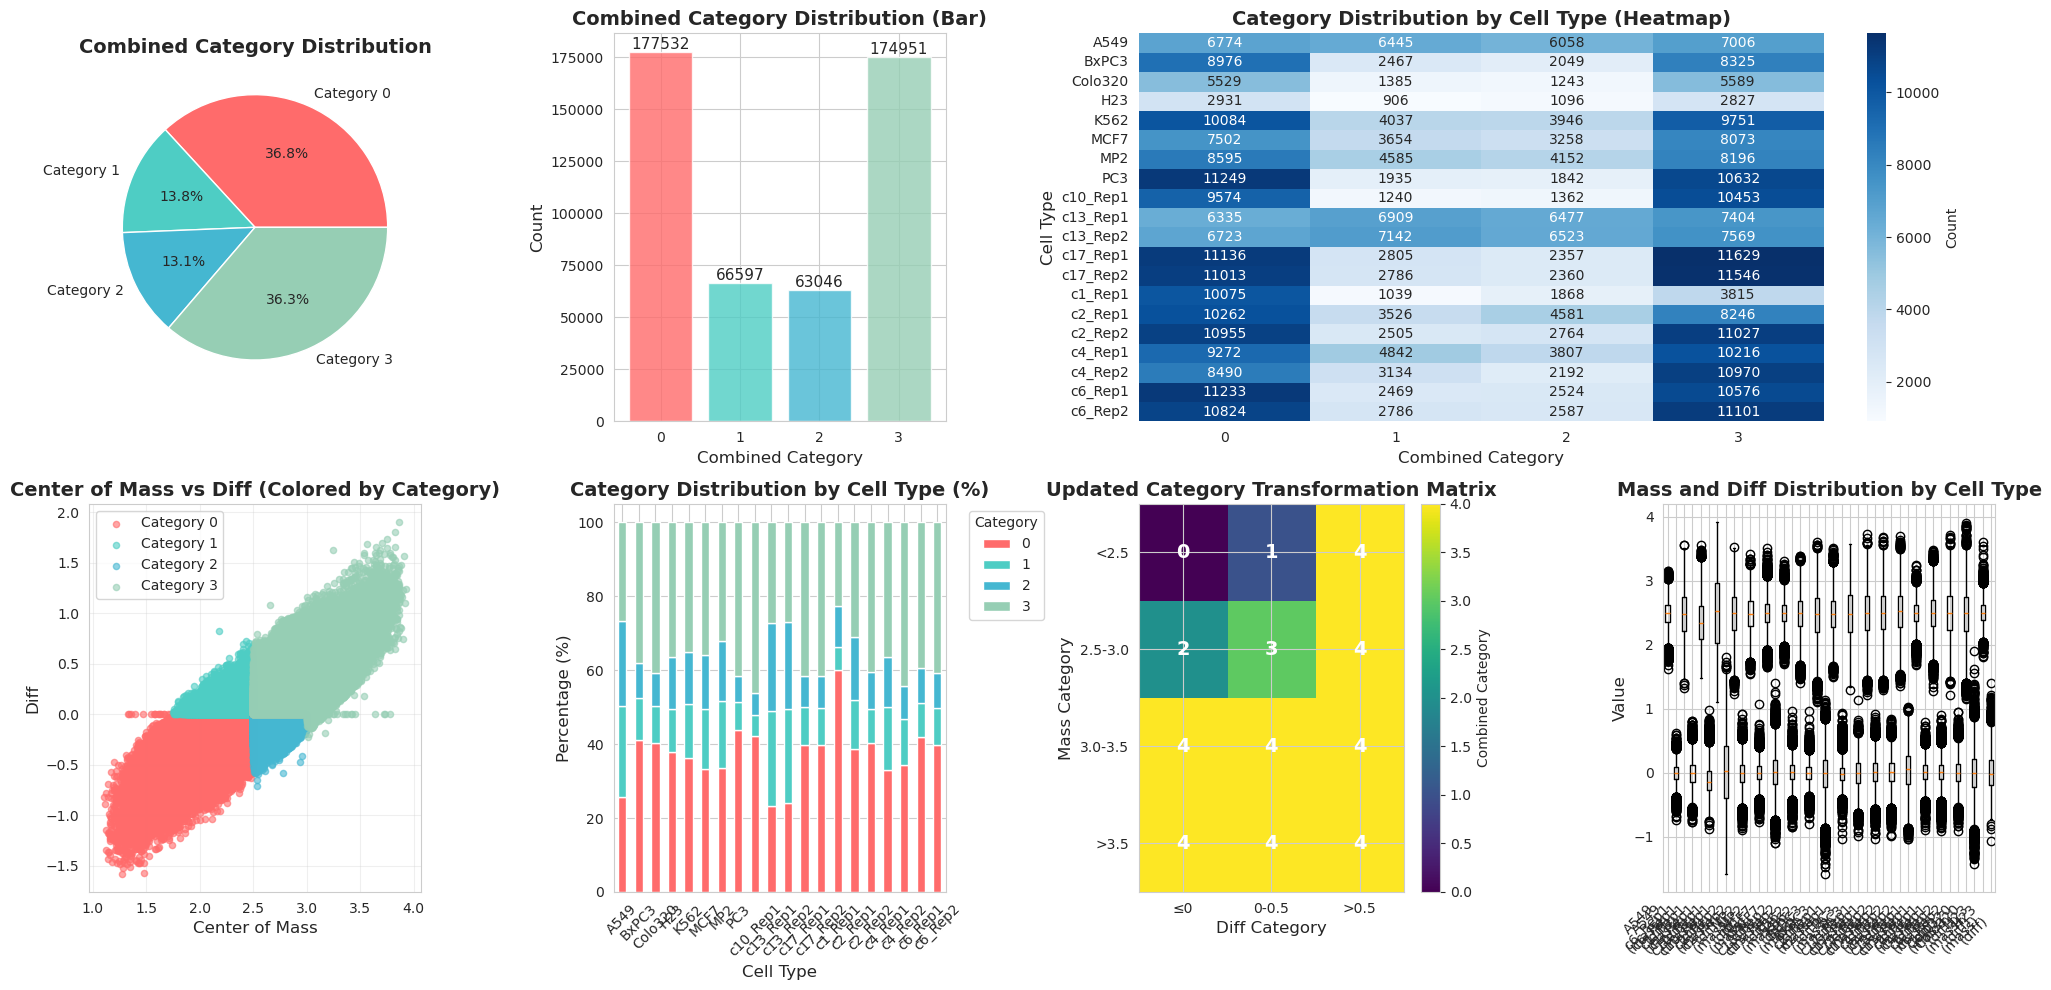

Detailed Statistics (Updated with Category 4)

1. Combined Category Distribution:
   Category 0: 177,532 samples (36.8%)
   Category 1: 66,597 samples (13.8%)
   Category 2: 63,046 samples (13.1%)
   Category 3: 174,951 samples (36.3%)

2. Total Samples: 482,126

3. Category Distribution by Cell Type:
combined_4_category       0      1      2       3     All
cell_type                                                
A549                   6774   6445   6058    7006   26283
BxPC3                  8976   2467   2049    8325   21817
Colo320                5529   1385   1243    5589   13746
H23                    2931    906   1096    2827    7760
K562                  10084   4037   3946    9751   27818
MCF7                   7502   3654   3258    8073   22487
MP2                    8595   4585   4152    8196   25528
PC3                   11249   1935   1842   10632   25658
c10_Rep1               9574   1240   1362   10453   22629
c13_Rep1               6335   6909   6477    7404   27125
c

In [9]:
# Set plotting style
sns.set_style("whitegrid")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 10))

# Updated colors for 5 categories
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFA07A']

# 1. Combined category distribution pie chart
ax1 = plt.subplot(2, 4, 1)
category_counts = utr3_df['combined_4_category'].value_counts().sort_index()
plt.pie(category_counts.values, labels=[f'Category {i}' for i in category_counts.index], 
        autopct='%1.1f%%', colors=colors[:len(category_counts)])
plt.title('Combined Category Distribution', fontsize=14, fontweight='bold')

# 2. Combined category distribution bar chart
ax2 = plt.subplot(2, 4, 2)
bars = plt.bar(category_counts.index, category_counts.values, 
               color=colors[:len(category_counts)], alpha=0.8)
plt.xlabel('Combined Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Combined Category Distribution (Bar)', fontsize=14, fontweight='bold')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

# 3. Heatmap of category distribution by cell type
ax3 = plt.subplot(2, 4, (3, 4))
crosstab_data = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_4_category'])
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Count'})
plt.title('Category Distribution by Cell Type (Heatmap)', fontsize=14, fontweight='bold')
plt.xlabel('Combined Category', fontsize=12)
plt.ylabel('Cell Type', fontsize=12)

# 4. Scatter plot: center_of_mass vs diff, colored by combined_4_category
ax4 = plt.subplot(2, 4, 5)
scatter_colors = colors[:5]  # Use first 5 colors
for i, category in enumerate(sorted(utr3_df['combined_4_category'].unique())):
    subset = utr3_df[utr3_df['combined_4_category'] == category]
    plt.scatter(subset['center_of_mass'], subset['diff'], 
               c=scatter_colors[i], label=f'Category {category}', 
               alpha=0.6, s=20)

plt.xlabel('Center of Mass', fontsize=12)
plt.ylabel('Diff', fontsize=12)
plt.title('Center of Mass vs Diff (Colored by Category)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Stacked bar chart of category distribution by cell type
ax5 = plt.subplot(2, 4, 6)
crosstab_data_pct = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_4_category'], normalize='index') * 100
crosstab_data_pct.plot(kind='bar', stacked=True, ax=ax5, 
                       color=colors[:len(crosstab_data_pct.columns)])
plt.title('Category Distribution by Cell Type (%)', fontsize=14, fontweight='bold')
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# 6. Updated Category transformation matrix visualization
ax6 = plt.subplot(2, 4, 7)
# Create updated category transformation matrix with Category 4 priority
mass_categories = ['<2.5', '2.5-3.0', '3.0-3.5', '>3.5']
diff_categories = ['≤0', '0-0.5', '>0.5']

# Create a more detailed transformation matrix
combination_matrix = np.array([
    [0, 1, 4],  # mass < 2.5
    [2, 3, 4],  # mass 2.5-3.0
    [4, 4, 4],  # mass 3.0-3.5 (Category 4 due to mass > 3.0)
    [4, 4, 4]   # mass > 3.5 (Category 4 due to mass > 3.0)
])

im = plt.imshow(combination_matrix, cmap='viridis', aspect='auto')
plt.colorbar(im, label='Combined Category')
plt.xticks(range(len(diff_categories)), diff_categories)
plt.yticks(range(len(mass_categories)), mass_categories)
plt.xlabel('Diff Category', fontsize=12)
plt.ylabel('Mass Category', fontsize=12)
plt.title('Updated Category Transformation Matrix', fontsize=14, fontweight='bold')

# Add values to each cell
for i in range(len(mass_categories)):
    for j in range(len(diff_categories)):
        plt.text(j, i, str(combination_matrix[i, j]), 
                ha='center', va='center', color='white', fontweight='bold', fontsize=14)

# 7. Box plot of center_of_mass and diff distribution by cell type
ax7 = plt.subplot(2, 4, 8)
# Create combined data for box plot
plot_data = []
labels = []
for cell_type in utr3_df['cell_type'].unique():
    subset = utr3_df[utr3_df['cell_type'] == cell_type]
    plot_data.extend([subset['center_of_mass'].values, subset['diff'].values])
    labels.extend([f'{cell_type}\n(mass)', f'{cell_type}\n(diff)'])

plt.boxplot(plot_data, labels=labels)
plt.title('Mass and Diff Distribution by Cell Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*60)
print("Detailed Statistics (Updated with Category 4)")
print("="*60)

print("\n1. Combined Category Distribution:")
category_stats = utr3_df['combined_4_category'].value_counts().sort_index()
for category, count in category_stats.items():
    percentage = (count / len(utr3_df)) * 100
    print(f"   Category {category}: {count:,} samples ({percentage:.1f}%)")

print(f"\n2. Total Samples: {len(utr3_df):,}")

print("\n3. Category Distribution by Cell Type:")
crosstab_detailed = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_4_category'], margins=True)
print(crosstab_detailed)

print("\n4. Category Distribution by Cell Type (Percentage):")
crosstab_pct_detailed = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_4_category'], normalize='index') * 100
print(crosstab_pct_detailed.round(1))

print("\n5. Basic Statistics for Each Metric:")
print("Center of Mass:")
print(utr3_df['center_of_mass'].describe())
print("\nDiff:")
print(utr3_df['diff'].describe())

print("\n6. Updated Category Transformation Rules:")
print("PRIORITY RULE: Category 4 if center_of_mass > 3.0 OR diff > 0.5")
print("\nOther Categories (if not Category 4):")
print("Mass Categories: 0(<2.5), 1(2.5-3.0), 2(≥3.0)")
print("Diff Categories: 0(≤0), 1(>0)")
print("Combination Mapping:")
combination_rules = {
    (0, 0): 0, (0, 1): 1, 
    (1, 0): 2, (1, 1): 3, 
    (2, 0): 3, (2, 1): 3
}
for (mass_cat, diff_cat), combined_cat in combination_rules.items():
    mass_desc = ['<2.5', '2.5-3.0', '≥3.0'][mass_cat]
    diff_desc = ['≤0', '>0'][diff_cat]
    print(f"   Mass {mass_desc} + Diff {diff_desc} → Category {combined_cat}")

print("\n8. Category Descriptions:")
print("   Category 0: Low mass (<2.5) + Non-positive diff (≤0)")
print("   Category 1: Low mass (<2.5) + Positive diff (>0)")
print("   Category 2: Medium mass (2.5-3.0) + Non-positive diff (≤0)")
print("   Category 3: Medium/High mass (≥2.5) + Positive diff (>0), but not meeting Category 4 criteria")

### visualize 5 level

In [10]:
print("Updated grading result distribution:")
print(utr3_df['combined_5_category'].value_counts().sort_index())

# 查看不同cell_type下的分级分布
print("\nHierarchical distribution under different cell_type:")
print(pd.crosstab(utr3_df['cell_type'], utr3_df['combined_5_category']))

# 显示分级规则说明
print("\nClassification rule description:")
print("Category 4: center_of_mass > 3.0 OR diff > 0.5 (high activity/high difference)")
print("Other classification rules:")
print("Mass classification: 0(<2.5), 1(2.5-3.0), 2(≥3.0)")
print("Diff classification: 0(≤0), 1(>0)")
print("Combination mapping (if Category 4 conditions are not met):")

combination_rules = {
    (0, 0): 0, (0, 1): 1, 
    (1, 0): 2, (1, 1): 3, 
    (2, 0): 3, (2, 1): 3
}
for (mass_cat, diff_cat), combined_cat in combination_rules.items():
    mass_desc = ['<2.5', '2.5-3.0', '≥3.0'][mass_cat]
    diff_desc = ['≤0', '>0'][diff_cat]
    print(f"   Mass {mass_desc} + Diff {diff_desc} → Category {combined_cat}")

# 查看Category 4的详细统计
category_4_samples = utr3_df[utr3_df['combined_5_category'] == 4]
print(f"\nCategory 4 detailed statistics:")
print(f"Total: {len(category_4_samples)} samples")

if len(category_4_samples) > 0:
    # 分析Category 4中满足不同条件的样本数
    mass_gt_3 = category_4_samples[category_4_samples['center_of_mass'] > 3.0]
    diff_gt_0_5 = category_4_samples[category_4_samples['diff'] > 0.5]
    both_conditions = category_4_samples[(category_4_samples['center_of_mass'] > 3.0) & 
                                        (category_4_samples['diff'] > 0.5)]
    
    print(f"满足 center_of_mass > 3.0: {len(mass_gt_3)} 个样本")
    print(f"满足 diff > 0.5: {len(diff_gt_0_5)} 个样本")
    print(f"同时满足两个条件: {len(both_conditions)} 个样本")
    
    print(f"\nCategory 4样本的基本统计:")
    print("Center of Mass:")
    print(category_4_samples['center_of_mass'].describe())
    print("\nDiff:")
    print(category_4_samples['diff'].describe())

Updated grading result distribution:
combined_5_category
0    177532
1     66452
2     63046
3    140772
4     34324
Name: count, dtype: int64

Hierarchical distribution under different cell_type:
combined_5_category      0     1     2     3     4
cell_type                                         
A549                  6774  6445  6058  6899   107
BxPC3                 8976  2464  2049  6290  2038
Colo320               5529  1381  1243  4153  1440
H23                   2931   900  1096  2242   591
K562                 10084  4035  3946  8697  1056
MCF7                  7502  3574  3258  6877  1276
MP2                   8595  4584  4152  7580   617
PC3                  11249  1935  1842  7949  2683
c10_Rep1              9574  1231  1362  4422  6040
c13_Rep1              6335  6901  6477  7296   116
c13_Rep2              6723  7134  6523  7378   199
c17_Rep1             11136  2805  2357  8798  2831
c17_Rep2             11013  2786  2360  8716  2830
c1_Rep1              10075  1037  1868

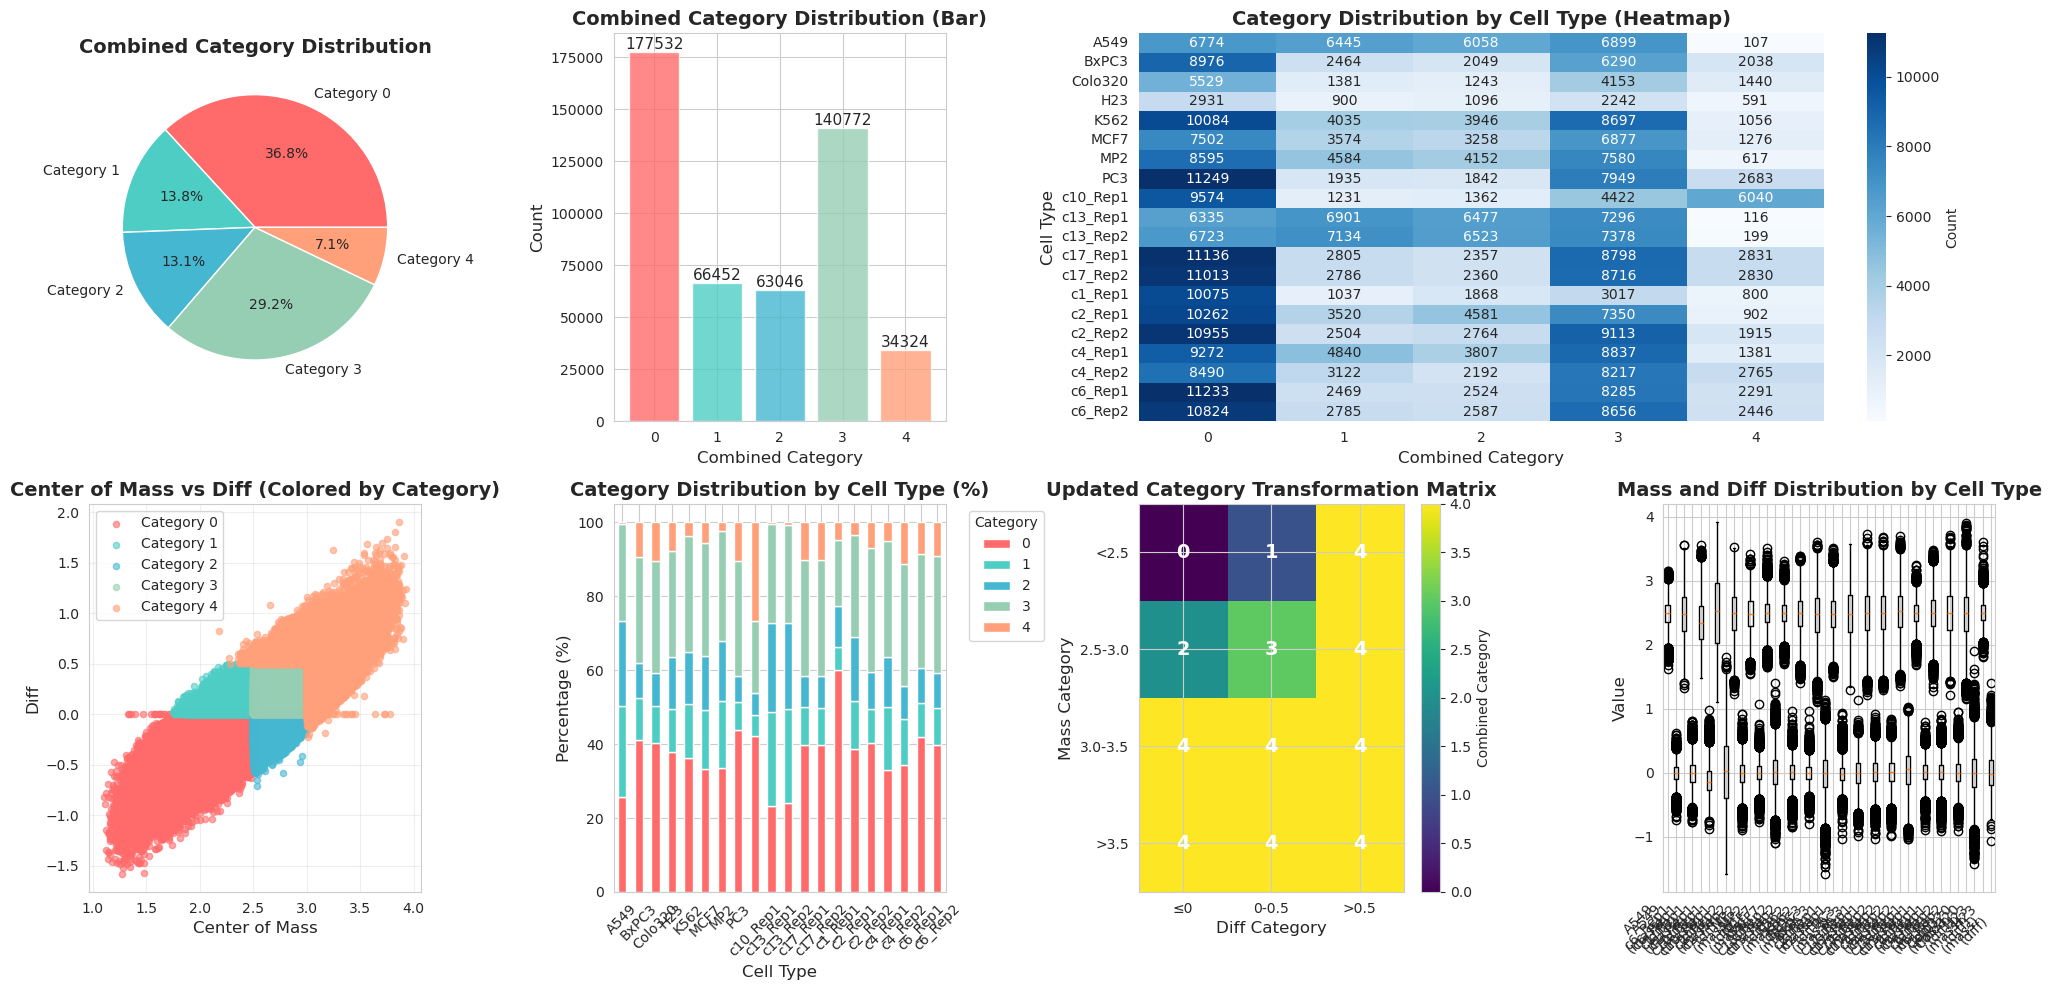

Detailed Statistics (Updated with Category 4)

1. Combined Category Distribution:
   Category 0: 177,532 samples (36.8%)
   Category 1: 66,452 samples (13.8%)
   Category 2: 63,046 samples (13.1%)
   Category 3: 140,772 samples (29.2%)
   Category 4: 34,324 samples (7.1%)

2. Total Samples: 482,126

3. Category Distribution by Cell Type:
combined_5_category       0      1      2       3      4     All
cell_type                                                       
A549                   6774   6445   6058    6899    107   26283
BxPC3                  8976   2464   2049    6290   2038   21817
Colo320                5529   1381   1243    4153   1440   13746
H23                    2931    900   1096    2242    591    7760
K562                  10084   4035   3946    8697   1056   27818
MCF7                   7502   3574   3258    6877   1276   22487
MP2                    8595   4584   4152    7580    617   25528
PC3                   11249   1935   1842    7949   2683   25658
c10_Rep1  

In [11]:

# Set plotting style
sns.set_style("whitegrid")

# Create a large figure with multiple subplots
fig = plt.figure(figsize=(20, 10))

# Updated colors for 5 categories
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFA07A']

# 1. Combined category distribution pie chart
ax1 = plt.subplot(2, 4, 1)
category_counts = utr3_df['combined_5_category'].value_counts().sort_index()
plt.pie(category_counts.values, labels=[f'Category {i}' for i in category_counts.index], 
        autopct='%1.1f%%', colors=colors[:len(category_counts)])
plt.title('Combined Category Distribution', fontsize=14, fontweight='bold')

# 2. Combined category distribution bar chart
ax2 = plt.subplot(2, 4, 2)
bars = plt.bar(category_counts.index, category_counts.values, 
               color=colors[:len(category_counts)], alpha=0.8)
plt.xlabel('Combined Category', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Combined Category Distribution (Bar)', fontsize=14, fontweight='bold')
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{int(height)}', ha='center', va='bottom', fontsize=11)

# 3. Heatmap of category distribution by cell type
ax3 = plt.subplot(2, 4, (3, 4))
crosstab_data = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_5_category'])
sns.heatmap(crosstab_data, annot=True, fmt='d', cmap='Blues', 
            cbar_kws={'label': 'Count'})
plt.title('Category Distribution by Cell Type (Heatmap)', fontsize=14, fontweight='bold')
plt.xlabel('Combined Category', fontsize=12)
plt.ylabel('Cell Type', fontsize=12)

# 4. Scatter plot: center_of_mass vs diff, colored by combined_5_category
ax4 = plt.subplot(2, 4, 5)
scatter_colors = colors[:5]  # Use first 5 colors
for i, category in enumerate(sorted(utr3_df['combined_5_category'].unique())):
    subset = utr3_df[utr3_df['combined_5_category'] == category]
    plt.scatter(subset['center_of_mass'], subset['diff'], 
               c=scatter_colors[i], label=f'Category {category}', 
               alpha=0.6, s=20)

plt.xlabel('Center of Mass', fontsize=12)
plt.ylabel('Diff', fontsize=12)
plt.title('Center of Mass vs Diff (Colored by Category)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)

# 5. Stacked bar chart of category distribution by cell type
ax5 = plt.subplot(2, 4, 6)
crosstab_data_pct = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_5_category'], normalize='index') * 100
crosstab_data_pct.plot(kind='bar', stacked=True, ax=ax5, 
                       color=colors[:len(crosstab_data_pct.columns)])
plt.title('Category Distribution by Cell Type (%)', fontsize=14, fontweight='bold')
plt.xlabel('Cell Type', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

# 6. Updated Category transformation matrix visualization
ax6 = plt.subplot(2, 4, 7)
# Create updated category transformation matrix with Category 4 priority
mass_categories = ['<2.5', '2.5-3.0', '3.0-3.5', '>3.5']
diff_categories = ['≤0', '0-0.5', '>0.5']

# Create a more detailed transformation matrix
combination_matrix = np.array([
    [0, 1, 4],  # mass < 2.5
    [2, 3, 4],  # mass 2.5-3.0
    [4, 4, 4],  # mass 3.0-3.5 (Category 4 due to mass > 3.0)
    [4, 4, 4]   # mass > 3.5 (Category 4 due to mass > 3.0)
])

im = plt.imshow(combination_matrix, cmap='viridis', aspect='auto')
plt.colorbar(im, label='Combined Category')
plt.xticks(range(len(diff_categories)), diff_categories)
plt.yticks(range(len(mass_categories)), mass_categories)
plt.xlabel('Diff Category', fontsize=12)
plt.ylabel('Mass Category', fontsize=12)
plt.title('Updated Category Transformation Matrix', fontsize=14, fontweight='bold')

# Add values to each cell
for i in range(len(mass_categories)):
    for j in range(len(diff_categories)):
        plt.text(j, i, str(combination_matrix[i, j]), 
                ha='center', va='center', color='white', fontweight='bold', fontsize=14)

# 7. Box plot of center_of_mass and diff distribution by cell type
ax7 = plt.subplot(2, 4, 8)
# Create combined data for box plot
plot_data = []
labels = []
for cell_type in utr3_df['cell_type'].unique():
    subset = utr3_df[utr3_df['cell_type'] == cell_type]
    plot_data.extend([subset['center_of_mass'].values, subset['diff'].values])
    labels.extend([f'{cell_type}\n(mass)', f'{cell_type}\n(diff)'])

plt.boxplot(plot_data, labels=labels)
plt.title('Mass and Diff Distribution by Cell Type', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Value', fontsize=12)

plt.tight_layout()
plt.show()

# Print detailed statistics
print("="*60)
print("Detailed Statistics (Updated with Category 4)")
print("="*60)

print("\n1. Combined Category Distribution:")
category_stats = utr3_df['combined_5_category'].value_counts().sort_index()
for category, count in category_stats.items():
    percentage = (count / len(utr3_df)) * 100
    print(f"   Category {category}: {count:,} samples ({percentage:.1f}%)")

print(f"\n2. Total Samples: {len(utr3_df):,}")

print("\n3. Category Distribution by Cell Type:")
crosstab_detailed = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_5_category'], margins=True)
print(crosstab_detailed)

print("\n4. Category Distribution by Cell Type (Percentage):")
crosstab_pct_detailed = pd.crosstab(utr3_df['cell_type'], utr3_df['combined_5_category'], normalize='index') * 100
print(crosstab_pct_detailed.round(1))

print("\n5. Basic Statistics for Each Metric:")
print("Center of Mass:")
print(utr3_df['center_of_mass'].describe())
print("\nDiff:")
print(utr3_df['diff'].describe())

print("\n6. Updated Category Transformation Rules:")
print("PRIORITY RULE: Category 4 if center_of_mass > 3.0 OR diff > 0.5")
print("\nOther Categories (if not Category 4):")
print("Mass Categories: 0(<2.5), 1(2.5-3.0), 2(≥3.0)")
print("Diff Categories: 0(≤0), 1(>0)")
print("Combination Mapping:")
combination_rules = {
    (0, 0): 0, (0, 1): 1, 
    (1, 0): 2, (1, 1): 3, 
    (2, 0): 3, (2, 1): 3
}
for (mass_cat, diff_cat), combined_cat in combination_rules.items():
    mass_desc = ['<2.5', '2.5-3.0', '≥3.0'][mass_cat]
    diff_desc = ['≤0', '>0'][diff_cat]
    print(f"   Mass {mass_desc} + Diff {diff_desc} → Category {combined_cat}")

# Additional analysis for Category 4
print("\n7. Category 4 Detailed Analysis:")
category_4_samples = utr3_df[utr3_df['combined_5_category'] == 4]
if len(category_4_samples) > 0:
    mass_gt_3 = category_4_samples[category_4_samples['center_of_mass'] > 3.0]
    diff_gt_0_5 = category_4_samples[category_4_samples['diff'] > 0.5]
    both_conditions = category_4_samples[(category_4_samples['center_of_mass'] > 3.0) & 
                                        (category_4_samples['diff'] > 0.5)]
    
    print(f"   Total Category 4 samples: {len(category_4_samples)}")
    print(f"   Samples with center_of_mass > 3.0: {len(mass_gt_3)} ({len(mass_gt_3)/len(category_4_samples)*100:.1f}%)")
    print(f"   Samples with diff > 0.5: {len(diff_gt_0_5)} ({len(diff_gt_0_5)/len(category_4_samples)*100:.1f}%)")
    print(f"   Samples meeting both conditions: {len(both_conditions)} ({len(both_conditions)/len(category_4_samples)*100:.1f}%)")
    
    print(f"\n   Category 4 Statistics:")
    print("   Center of Mass:")
    print(f"     Mean: {category_4_samples['center_of_mass'].mean():.3f}")
    print(f"     Min: {category_4_samples['center_of_mass'].min():.3f}")
    print(f"     Max: {category_4_samples['center_of_mass'].max():.3f}")
    print("   Diff:")
    print(f"     Mean: {category_4_samples['diff'].mean():.3f}")
    print(f"     Min: {category_4_samples['diff'].min():.3f}")
    print(f"     Max: {category_4_samples['diff'].max():.3f}")
else:
    print("   No samples found in Category 4")

print("\n8. Category Descriptions:")
print("   Category 0: Low mass (<2.5) + Non-positive diff (≤0)")
print("   Category 1: Low mass (<2.5) + Positive diff (>0)")
print("   Category 2: Medium mass (2.5-3.0) + Non-positive diff (≤0)")
print("   Category 3: Medium/High mass (≥2.5) + Positive diff (>0), but not meeting Category 4 criteria")
print("   Category 4: HIGH ACTIVITY - Either mass > 3.0 OR diff > 0.5 (or both)")

In [12]:
utr3_df

,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID,fold,mean_center_of_mass,diff,cell_type_code,combined_4_category,combined_5_category
26928,CGAATTGTAATAAGTGTCCTAAGTAGCAGGACTTAACATAGAAAGA...,2.545337,2.178205,2885.337177,0.462334,A549,TSC22D2_part_21_type_middle_overlap_50,val,2.752998,-0.207661,0,2,2
26145,TCAAATGCATTACGCTAAAGGAAAGAACCCAGTCCCAAAAAGTTAC...,2.471913,-1.341167,2850.077752,-0.128891,c6_Rep1,NaN,train,2.552489,-0.080576,1,0,0
10787,ATGCCTGCCTATTTGGATGGGTATGTCAAACGCTTTCTTCTGGACA...,2.196962,-8.305841,939.037621,-1.129008,c1_Rep1,NaN,train,2.335757,-0.138795,2,0,0
9554,AGATTTTCGTCCTGAAAACTTGGGAGGAGGAATTGTTTGATTCTCC...,3.091018,20.869890,1558.650776,0.992797,c10_Rep1,NaN,train,2.666265,0.424753,3,3,4
7106,TGGTTTTTATTTGCAGTTTTTAGTTGCTGTAATTGTTGCTGTTTCC...,2.848042,10.896188,1225.169841,1.022520,c2_Rep2,NaN,train,2.779732,0.068310,4,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13410,ATTCTCCAGGTCCAAGGCAGAGATCCTGAAAAGATAGGGCTATTGT...,2.379524,-6.346775,3469.086656,-0.608390,c6_Rep1,NaN,train,2.423649,-0.044125,1,0,0
16251,CGGCTGGAAGCAGAGGCCTTCGTAGGTGATGGCCTGCATGTTGTAA...,2.557310,2.701370,2777.289157,0.258354,c6_Rep1,NaN,train,2.542396,0.014913,1,3,3
18305,TGTTTTTCTCACTGTGGTGTGATTGGCTAAACAATCTCGCATTAAA...,3.046742,17.155525,1230.703443,2.778007,MP2,PHF6_part_18_type_middle_overlap_50,train,2.751035,0.295707,5,3,4
12460,AACTGCAGGGCTGTCAGGAGGATCAGAAATACTGTAACAGACATAA...,2.009885,-23.079223,2771.769401,-2.439837,c2_Rep1,NaN,train,2.088828,-0.078943,10,0,0


# add class: combine level and cell type

In [13]:
# 添加 combined_4_category_with_cell_type 列
utr3_df['combined_4_category_with_cell_type'] = (
    'CELL' + utr3_df['cell_type_code'].astype(str) + '_LEVEL' + 
    utr3_df['combined_4_category'].astype(str)
)

# 添加 combined_5_category_with_cell_type 列
utr3_df['combined_5_category_with_cell_type'] = (
    'CELL' + utr3_df['cell_type_code'].astype(str) + '_LEVEL' + 
    utr3_df['combined_5_category'].astype(str)
)

# 验证新列的唯一值数量
print(f"combined_4_category_with_cell_type unique values: {utr3_df['combined_4_category_with_cell_type'].nunique()}")
print(f"combined_5_category_with_cell_type unique values: {utr3_df['combined_5_category_with_cell_type'].nunique()}")

# 为 combined_4_category_with_cell_type 创建编码
utr3_df['combined_4_category_with_cell_type_code'] = pd.Categorical(
    utr3_df['combined_4_category_with_cell_type']
).codes

# 为 combined_5_category_with_cell_type 创建编码
utr3_df['combined_5_category_with_cell_type_code'] = pd.Categorical(
    utr3_df['combined_5_category_with_cell_type']
).codes

# 验证编码范围
print(f"combined_4_category_code range: {utr3_df['combined_4_category_with_cell_type_code'].min()} to {utr3_df['combined_4_category_with_cell_type_code'].max()}")
print(f"combined_5_category_code range: {utr3_df['combined_5_category_with_cell_type_code'].min()} to {utr3_df['combined_5_category_with_cell_type_code'].max()}")

combined_4_category_with_cell_type unique values: 80
combined_5_category_with_cell_type unique values: 100
combined_4_category_code range: 0 to 79
combined_5_category_code range: 0 to 99


In [14]:
utr3_df

,sequence,center_of_mass,z_score,total_counts,adjusted_z_score,cell_type,ID,fold,mean_center_of_mass,diff,cell_type_code,combined_4_category,combined_5_category,combined_4_category_with_cell_type,combined_5_category_with_cell_type,combined_4_category_with_cell_type_code,combined_5_category_with_cell_type_code
26928,CGAATTGTAATAAGTGTCCTAAGTAGCAGGACTTAACATAGAAAGA...,2.545337,2.178205,2885.337177,0.462334,A549,TSC22D2_part_21_type_middle_overlap_50,val,2.752998,-0.207661,0,2,2,CELL0_LEVEL2,CELL0_LEVEL2,2,2
26145,TCAAATGCATTACGCTAAAGGAAAGAACCCAGTCCCAAAAAGTTAC...,2.471913,-1.341167,2850.077752,-0.128891,c6_Rep1,NaN,train,2.552489,-0.080576,1,0,0,CELL1_LEVEL0,CELL1_LEVEL0,44,55
10787,ATGCCTGCCTATTTGGATGGGTATGTCAAACGCTTTCTTCTGGACA...,2.196962,-8.305841,939.037621,-1.129008,c1_Rep1,NaN,train,2.335757,-0.138795,2,0,0,CELL2_LEVEL0,CELL2_LEVEL0,48,60
9554,AGATTTTCGTCCTGAAAACTTGGGAGGAGGAATTGTTTGATTCTCC...,3.091018,20.869890,1558.650776,0.992797,c10_Rep1,NaN,train,2.666265,0.424753,3,3,4,CELL3_LEVEL3,CELL3_LEVEL4,55,69
7106,TGGTTTTTATTTGCAGTTTTTAGTTGCTGTAATTGTTGCTGTTTCC...,2.848042,10.896188,1225.169841,1.022520,c2_Rep2,NaN,train,2.779732,0.068310,4,3,3,CELL4_LEVEL3,CELL4_LEVEL3,59,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13410,ATTCTCCAGGTCCAAGGCAGAGATCCTGAAAAGATAGGGCTATTGT...,2.379524,-6.346775,3469.086656,-0.608390,c6_Rep1,NaN,train,2.423649,-0.044125,1,0,0,CELL1_LEVEL0,CELL1_LEVEL0,44,55
16251,CGGCTGGAAGCAGAGGCCTTCGTAGGTGATGGCCTGCATGTTGTAA...,2.557310,2.701370,2777.289157,0.258354,c6_Rep1,NaN,train,2.542396,0.014913,1,3,3,CELL1_LEVEL3,CELL1_LEVEL3,47,58
18305,TGTTTTTCTCACTGTGGTGTGATTGGCTAAACAATCTCGCATTAAA...,3.046742,17.155525,1230.703443,2.778007,MP2,PHF6_part_18_type_middle_overlap_50,train,2.751035,0.295707,5,3,4,CELL5_LEVEL3,CELL5_LEVEL4,63,79
12460,AACTGCAGGGCTGTCAGGAGGATCAGAAATACTGTAACAGACATAA...,2.009885,-23.079223,2771.769401,-2.439837,c2_Rep1,NaN,train,2.088828,-0.078943,10,0,0,CELL10_LEVEL0,CELL10_LEVEL0,4,5


In [15]:
utr3_df.to_csv('./Data/vJun26_3UTR_mincount100_4or5Level_CellType.csv')

In [16]:
for t in utr3_df.cell_type.unique():
    print(t)

A549
c6_Rep1
c1_Rep1
c10_Rep1
c2_Rep2
MP2
MCF7
c13_Rep2
K562
BxPC3
c2_Rep1
PC3
c17_Rep1
c17_Rep2
c4_Rep2
c13_Rep1
c4_Rep1
c6_Rep2
Colo320
H23
